## Load libraries

In [30]:
# Libraries to work cross-platform
import os

# Libraries to work with dataset
import pandas as pd
import numpy as np
import ast                      # convert string to list after importing csv data
import pickle

# Library to create embeddings
# import nltk
from gensim.models.keyedvectors import KeyedVectors
import spacy

# Libraries to visualize data
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
# import matplotlib.cm as cm

# Libraries for monitoring operation process
from tqdm import tqdm     # displaying progress bar while running computation

## Configurate and declare global variables

In [2]:
os_name = os.name

if os_name == 'nt':
    BASE_DIR = "E:/THIENDHB_GOOGLEDRIVE/MASTER TILBURG/THESIS/"
    INPUT_DIR = BASE_DIR + "DATASET/INPUT/"
    OUTPUT_DIR = BASE_DIR + "DATASET/OUTPUT/"
elif os_name == 'posix':
    BASE_DIR = "/media/pinkalinux/WORK/THIENDHB_GOOGLEDRIVE/MASTER TILBURG/THESIS/"
    INPUT_DIR = BASE_DIR + "DATASET/INPUT/"
    OUTPUT_DIR = BASE_DIR + "DATASET/OUTPUT/"

SEED = 6886

%matplotlib inline

## Import data

In [3]:
# Load clean job title dataset from file
job_df = pd.read_csv(
    OUTPUT_DIR + "clean_title_df.csv",
    converters={
        "job_title_token": ast.literal_eval,
    },
    dtype={
        "job_id": int,
        "job_title": str,
        "job_title_lemma": str,
    }
)

job_df

,job_id,job_title,job_title_lemma,job_title_token
0,1,Chief Financial Officer,chief financial officer,"[chief, financial, officer]"
1,2,Full-time Community Connections Intern (paid i...,time community connection intern pay internship,"[time, community, connection, intern, pay, int..."
2,3,Country Coordinator,country coordinator,"[country, coordinator]"
3,4,BCC Specialist,bcc specialist,"[bcc, specialist]"
4,5,Software Developer,software developer,"[software, developer]"
...,...,...,...,...
18987,18997,Senior Creative UX/ UI Designer,senior creative ux ui designer,"[senior, creative, ux, ui, designer]"
18988,18998,Category Development Manager,category development manager,"[category, development, manager]"
18989,18999,Operational Marketing Manager,operational marketing manager,"[operational, marketing, manager]"
18990,19000,Head of Online Sales Department,head online sale department,"[head, online, sale, department]"


## Create embeddings

In [4]:
def create_vocab_list(df, col):
    vocab = []
    for doc in tqdm(df[col]):
        vocab.extend(doc)
    return vocab

In [5]:
tqdm.pandas(desc="Creating Job Title Corpus")
full_vocab_list = create_vocab_list(job_df, 'job_title_token')

100%|███████████████████████████████████████████████████████████████████████| 18992/18992 [00:00<00:00, 2695253.65it/s]


In [6]:
print(len(full_vocab_list))
full_vocab_list[:10]

55565


['chief',
 'financial',
 'officer',
 'time',
 'community',
 'connection',
 'intern',
 'pay',
 'internship',
 'country']

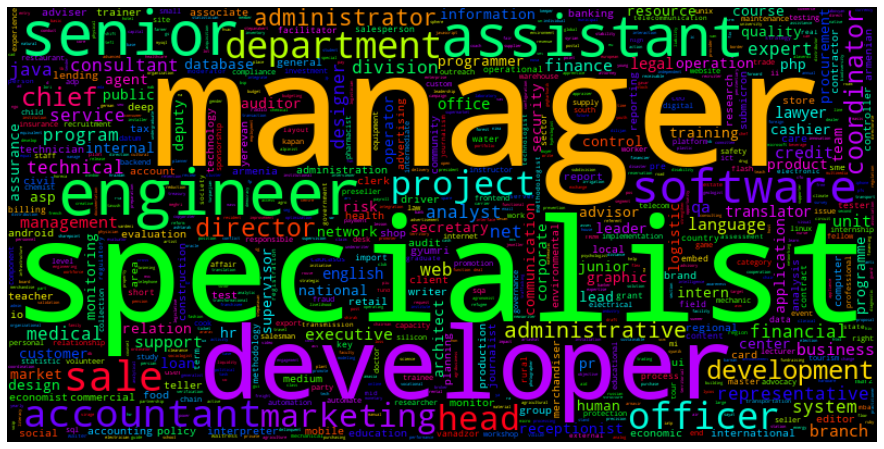

In [7]:
# Visualize the vocabulary list in Word Cloud

# Create a WordCloud object
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="black",
    max_words=10000,
    #     min_font_size=9,
    #     max_font_size=80,
    prefer_horizontal=0.95,
    repeat=False,
    collocations=False,  # whether to include collocations (bigrams) of two words
    colormap=sns.color_palette("hsv", as_cmap=True),
    random_state=SEED,
)

# Generate a word cloud
wordcloud.generate(",".join(full_vocab_list))

# Visualize the word cloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [8]:
vocab_list = list(set(full_vocab_list))
print(len(vocab_list))
vocab_list[:10]

2579


['effectiveness',
 'recent',
 'damage',
 'sqa',
 'landscaper',
 'help',
 'alumnus',
 'ultrasound',
 'meat',
 'brucellosis']

In [10]:
# load the Stanford GloVe model in Word2Vec format
# pre_model = KeyedVectors.load_word2vec_format(INPUT_DIR + "w2v_from_glove.6B.100d.txt")

In [11]:
# model_vocab = pre_model.index_to_key

In [10]:
# load the pre-trained Stanford GloVe model in Word2Vec format (dimension 300)
pre_model = spacy.load('en_core_web_lg')
pre_model.pipe_names

['tok2vec', 'tagger', 'parser', 'ner', 'attribute_ruler', 'lemmatizer']

In [11]:
if 'parser' in pre_model.pipe_names:
    pre_model.remove_pipe('parser')
if 'ner' in pre_model.pipe_names:
    pre_model.remove_pipe('ner')
pre_model.pipe_names

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer']

In [13]:
# model_corpus = pre_model(" ".join(vocab_list))

In [12]:
# model_vocab = [t.text for t in model_corpus]
# type(model_vocab), len(model_vocab), model_vocab[:10]
model_vocab = list(pre_model.vocab.strings)
type(model_vocab), len(model_vocab), model_vocab[:10]

(list,
 701570,
 ['\t', 'en', '\n', ' ', "'", "''", '"', "'Cause", 'because', "'cause"])

In [13]:
out_of_vocab = [token for token in vocab_list if token not in model_vocab]
print(len(out_of_vocab))
out_of_vocab[:20]

216


['tsaghkahovit',
 'athgo',
 'tirm',
 'amsg',
 'dilijan',
 'educationusa',
 'prfessional',
 'vlac',
 'adminsitrative',
 'cop',
 'gortsaranain',
 'yeghegnadzor',
 'gavar',
 'dafi',
 'instumintation',
 'dcfta',
 'fishfarm',
 'visitarm',
 'ashtarak',
 'komitas']

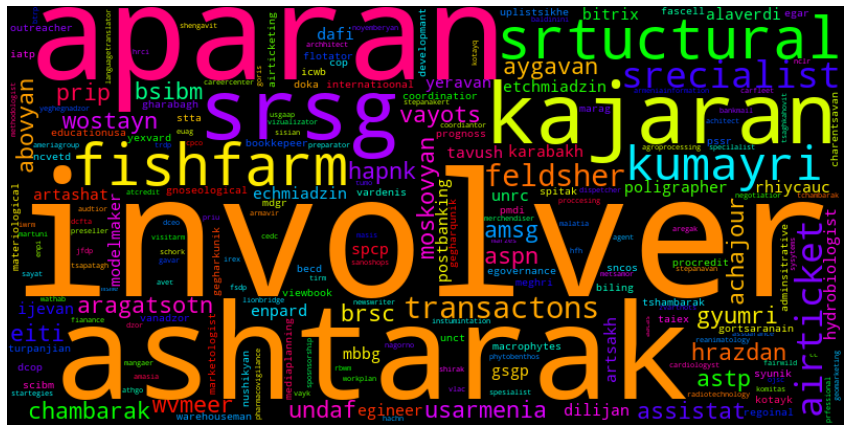

In [16]:
# Generate a word cloud
wordcloud.generate(",".join(out_of_vocab))

# Visualize the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [15]:
# Extract word embeddings from Spacy model
vector_list = []
word_list = []
for token in tqdm(vocab_list):
    if token in model_vocab:
        word_emb = pre_model(token)
        vector_list.append(word_emb.vector)
        word_list.append(token)
    else:
        continue

100%|█████████████████████████████████████████████████████████████████████████████| 2579/2579 [00:09<00:00, 266.15it/s]


In [16]:
# Store word embeddings in Gensim keyed vectors
vector_size = len(vector_list[0])
print(vector_size)

kv = KeyedVectors(vector_size=vector_size)
kv.add_vectors(keys=word_list, weights=vector_list)

300


In [18]:
# Save Gensim keyed vectors to file
kv.save(OUTPUT_DIR + 'title_word_vectors.kv')

In [19]:
# Normalize vectors
kv.fill_norms(force=True)

# Save normalized keyed vectors to file
kv.save(OUTPUT_DIR + 'title_word_norm_vectors.kv')

In [21]:
def vectorize(key_list, doc_list, kv, vector_size):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        key_list: List of unique ids (job_id) of documents
        doc_list: List of documents
        kv: GloVe's Word Embedding in Gensim Keyed Vectors format
        vector_size: dimension of 1 word embedding

    Returns:
        Dictionary of document ids and vectors (mean of word vectors)
    """
    features = {}

    process_doc_list = tqdm(enumerate(doc_list))
    process_doc_list.set_description(desc="Creating document embeddings")

    for idx, tokens in process_doc_list:
        key_id = key_list[idx]
        zero_vector = np.zeros(vector_size)
        vectors = []
        for token in tokens:
            if kv.has_index_for(token):
                vectors.append(kv.get_vector(token))
            else:
                continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features[key_id] = avg_vec
        else:
            features[key_id] = zero_vector
    return features

In [29]:
# title_embeddings = vectorize(title_docs, kv, vector_size)

title_embeddings_dict = vectorize(
    job_df["job_id"].values.tolist(),
    job_df["job_title_token"].values.tolist(),
    kv,
    vector_size,
)
# print(len(title_embeddings), len(title_embeddings[0]))
# np.asarray(title_embeddings)[:1, :20]
title_embeddings = list(title_embeddings_dict.values())
title_embeddings_keys = list(title_embeddings_dict.keys())
(
    len(title_embeddings_keys),
    title_embeddings_keys[:20],
    len(title_embeddings),
    len(title_embeddings[0]),
    title_embeddings[0][:20]
)

Creating document embeddings: : 18992it [00:00, 45435.46it/s]


(18992,
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 18992,
 300,
 array([-0.45085335,  0.17004667,  0.170931  ,  0.13105367, -0.11325833,
        -0.137706  , -0.17120433, -0.10623666,  0.01349   ,  3.5291665 ,
        -0.4802854 , -0.363938  ,  0.34913   , -0.23519333, -0.30546334,
        -0.4336357 , -0.05779101,  0.33923998,  0.20500666,  0.10366999],
       dtype=float32))

In [31]:
# Save embeddings file in numpy format
title_embeddings_outfile = OUTPUT_DIR + "title_embeddings"
np.save(title_embeddings_outfile, title_embeddings)

In [32]:
# Save embeddings dict (job_id + vector)
pickle.dump(
    title_embeddings_dict,
    open(OUTPUT_DIR + "title_embeddings_dict.pkl", "wb"),
)